In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_data11.csv')

X = df.Tweets
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

Choose 3 models to fit data and present the results with confusion matric and roc curve. 

In [ ]:
def roc(name, prediction):
    fpr, tpr, thresholds = roc_curve(y_test, prediction)

    plt.title(name)
    plt.plot(fpr, tpr, color='darkorange', label='Roc (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='green', linestyle='dotted')
    plt.xlabel('False')
    plt.ylabel('True')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
tfidf = TfidfVectorizer(max_features=500000, ngram_range=(1, 2))
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

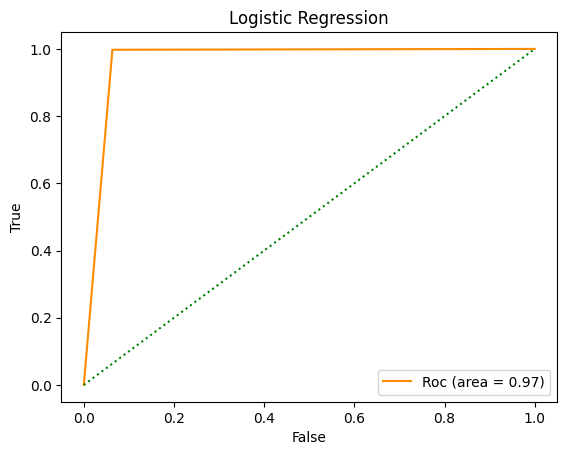

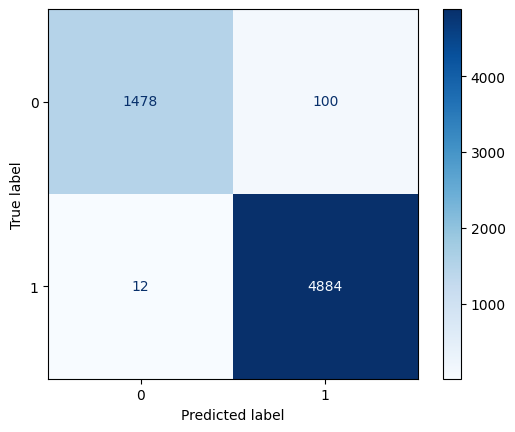

In [ ]:
pipeline = Pipeline([('tfidf', TfidfTransformer()),
                     ('model', LogisticRegression(max_iter=1000))])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)

roc("Logistic Regression", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.Blues)

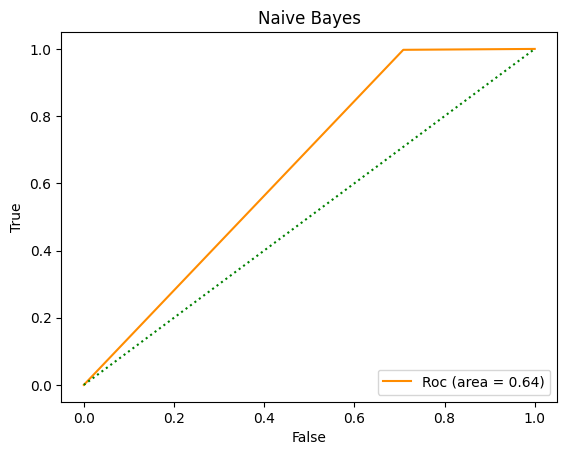

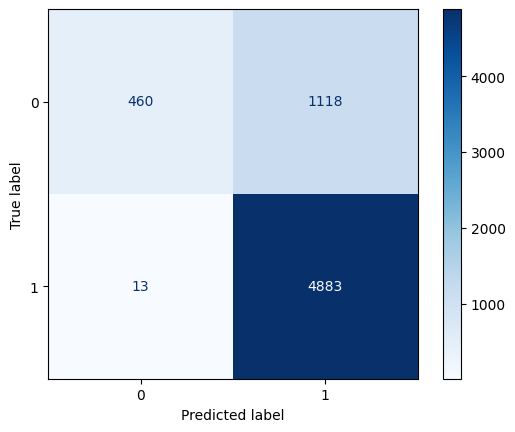

In [ ]:
pipeline = Pipeline([('tfidf', TfidfTransformer()),
                     ('model', MultinomialNB())])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
roc("Naive Bayes", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.Blues)

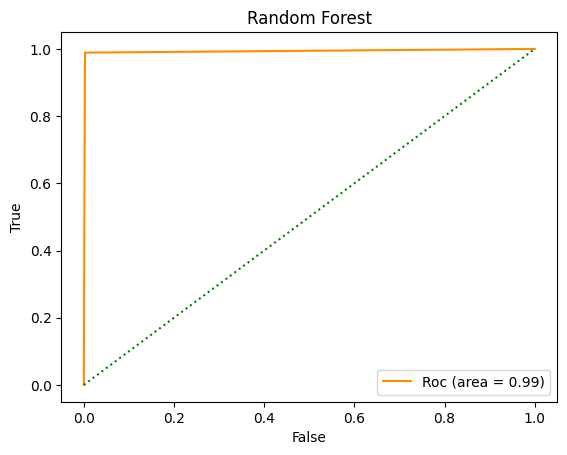

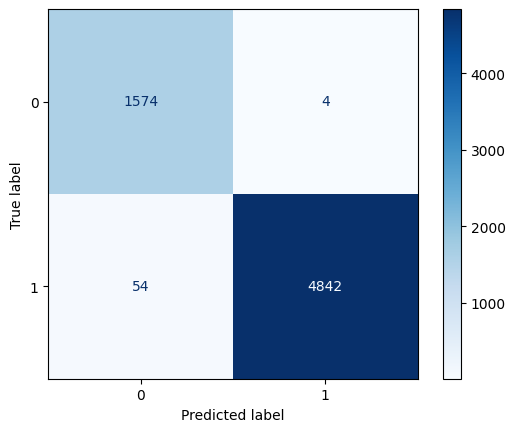

In [ ]:
pipeline = Pipeline([('tfidf', TfidfTransformer()),
                     ('model', RandomForestClassifier())])

model = pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
roc("Random Forest", prediction)
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.Blues)